In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import compCNN2

Using TensorFlow backend.


# Initialization

In [2]:
# initialize parameters
img_x, img_y = 28, 28 # for mnist we have 28x28 images
batch_size = 10
epochs = 5
num_classes = 10

nb_out_chan = 16
kernel_size = (5, 5)

trainX, trainY, testX, testY, input_shape = compCNN2.mnistData(img_x, img_y, num_classes)

smallIdx = int(trainX.shape[0]*0.01)
smallTrainX = trainX[:smallIdx,:,:,:]
smallTrainY = trainY[:smallIdx]

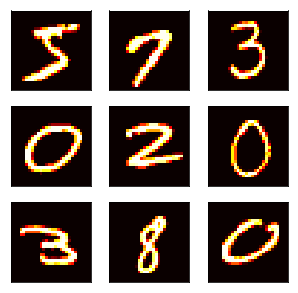

In [3]:
plt.figure(figsize=(5, 5))
for i, ind in enumerate([0, 15, 50, 156, 159, 210, 250, 300, 489]):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    img = plt.imshow(smallTrainX[ind, :, :, 0], cmap = "hot")

# Training the model

In [4]:
# Define the model with a given architecture
CNNModel = compCNN2.arch1(input_shape, num_classes, nb_out_chan, kernel_size)
print(CNNModel.summary())

# train the model
CNNModel.fit(smallTrainX, smallTrainY, batch_size, epochs)

# evaluate the model performance
compCNN2.evalModel(CNNModel, testX, testY, batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        56        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

# Convolutional layer 1

Output channel 1: Mean = -0.021350128576159477, Standard deviation = 0.0717264860868454
Output channel 2: Mean = 0.01133075263351202, Standard deviation = 0.05991535261273384
Output channel 3: Mean = -0.022498225793242455, Standard deviation = 0.06589058041572571
Output channel 4: Mean = 0.001537286676466465, Standard deviation = 0.06229553371667862
Output channel 5: Mean = -0.021324709057807922, Standard deviation = 0.07009851187467575
Output channel 6: Mean = -0.007394756190478802, Standard deviation = 0.06833752244710922
Output channel 7: Mean = 0.015472172759473324, Standard deviation = 0.06880196928977966
Output channel 8: Mean = -0.013774912804365158, Standard deviation = 0.07440623641014099
Output channel 9: Mean = -0.004119234625250101, Standard deviation = 0.07523427903652191
Output channel 10: Mean = 0.009299465455114841, Standard deviation = 0.06574980169534683
Output channel 11: Mean = -0.0020348841790109873, Standard deviation = 0.06940972059965134
Output channel 12: Mean 

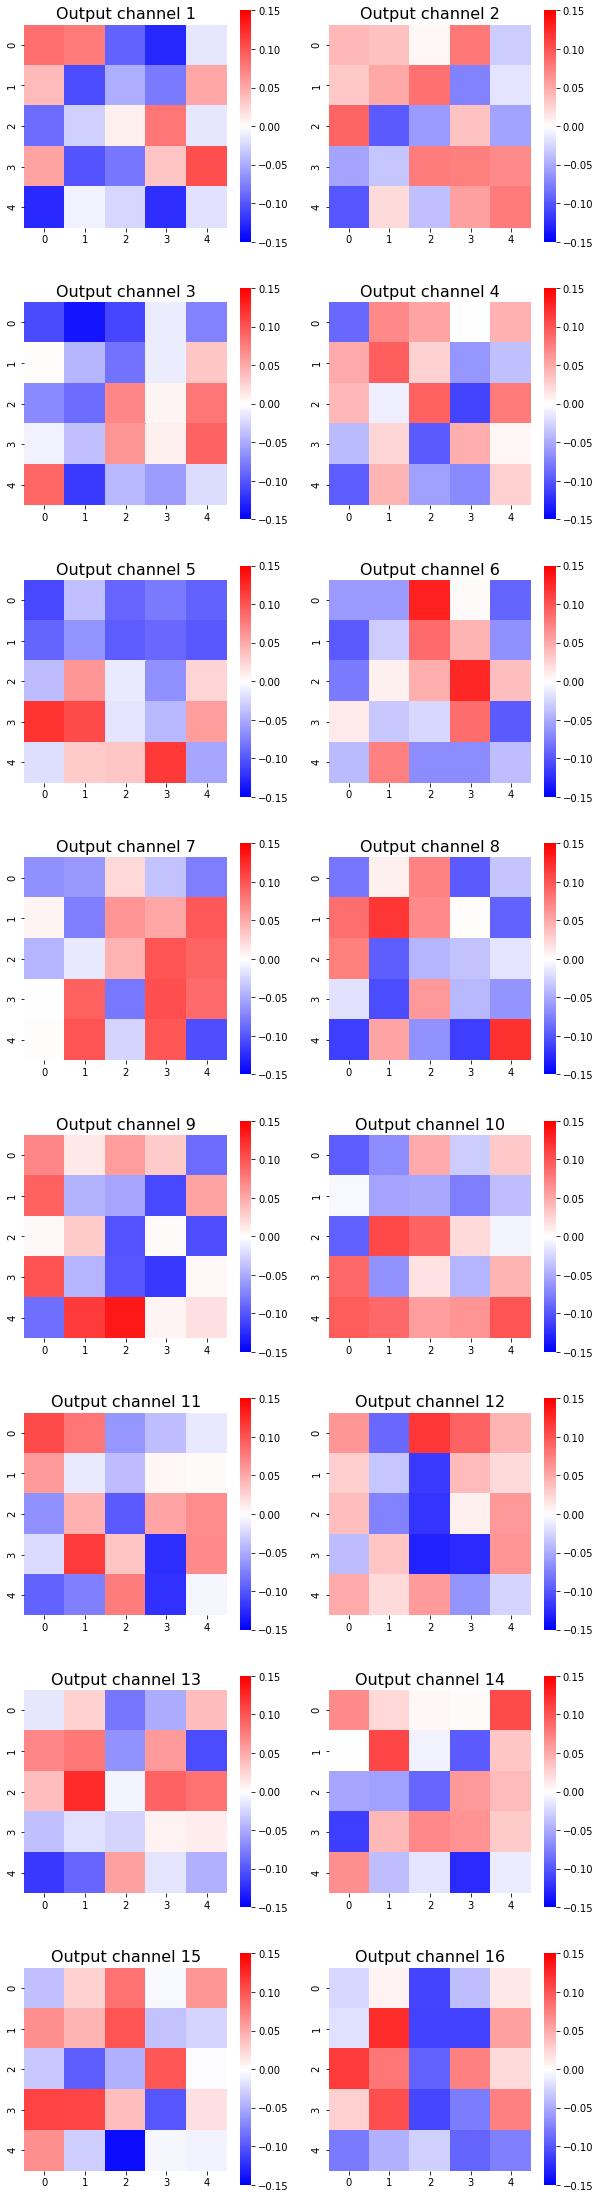

In [9]:
conv_layer1 = CNNModel.get_layer(index=0)
filter1 = conv_layer1.get_weights()[0] # Weights of the 1st convolution layer (without the bias)
chan1 = filter1.shape[3] # Number of output channels in convolution layer 1

fig = plt.figure(figsize=(10, 40))
sub_vert = (chan1+1)/2
sub_hori = 2
for i in range(chan1):
    ax = fig.add_subplot(sub_vert, sub_hori, i+1)
    ax.set_title("Output channel {}".format(i+1), fontsize=16)
    sns.heatmap(filter1[:, :, 0, i], vmin=-0.15, vmax=0.15, center=0, square=True, cmap="bwr")
    print("Output channel {}: Mean = {}, Standard deviation = {}".format(i+1, filter1[:, :, 0, i].mean(),
          filter1[:, :, 0, i].std()))

# Convolutional layer 2

Output channel 1: Mean = -0.019137660041451454, Standard deviation = 0.0818132534623146
Output channel 2: Mean = 0.0012493340764194727, Standard deviation = 0.06337728351354599
Output channel 3: Mean = 0.02288600616157055, Standard deviation = 0.046976540237665176
Output channel 4: Mean = 0.013422777876257896, Standard deviation = 0.05417102947831154
Output channel 5: Mean = -0.0247674360871315, Standard deviation = 0.0746682658791542
Output channel 6: Mean = -0.011016719043254852, Standard deviation = 0.042290620505809784
Output channel 7: Mean = -0.047354184091091156, Standard deviation = 0.04756702855229378
Output channel 8: Mean = -0.008193481713533401, Standard deviation = 0.09617391973733902
Output channel 9: Mean = 0.028687788173556328, Standard deviation = 0.05329735204577446
Output channel 10: Mean = -0.005949400365352631, Standard deviation = 0.06981708109378815
Output channel 11: Mean = 0.0021335764322429895, Standard deviation = 0.06951601803302765
Output channel 12: Mean =

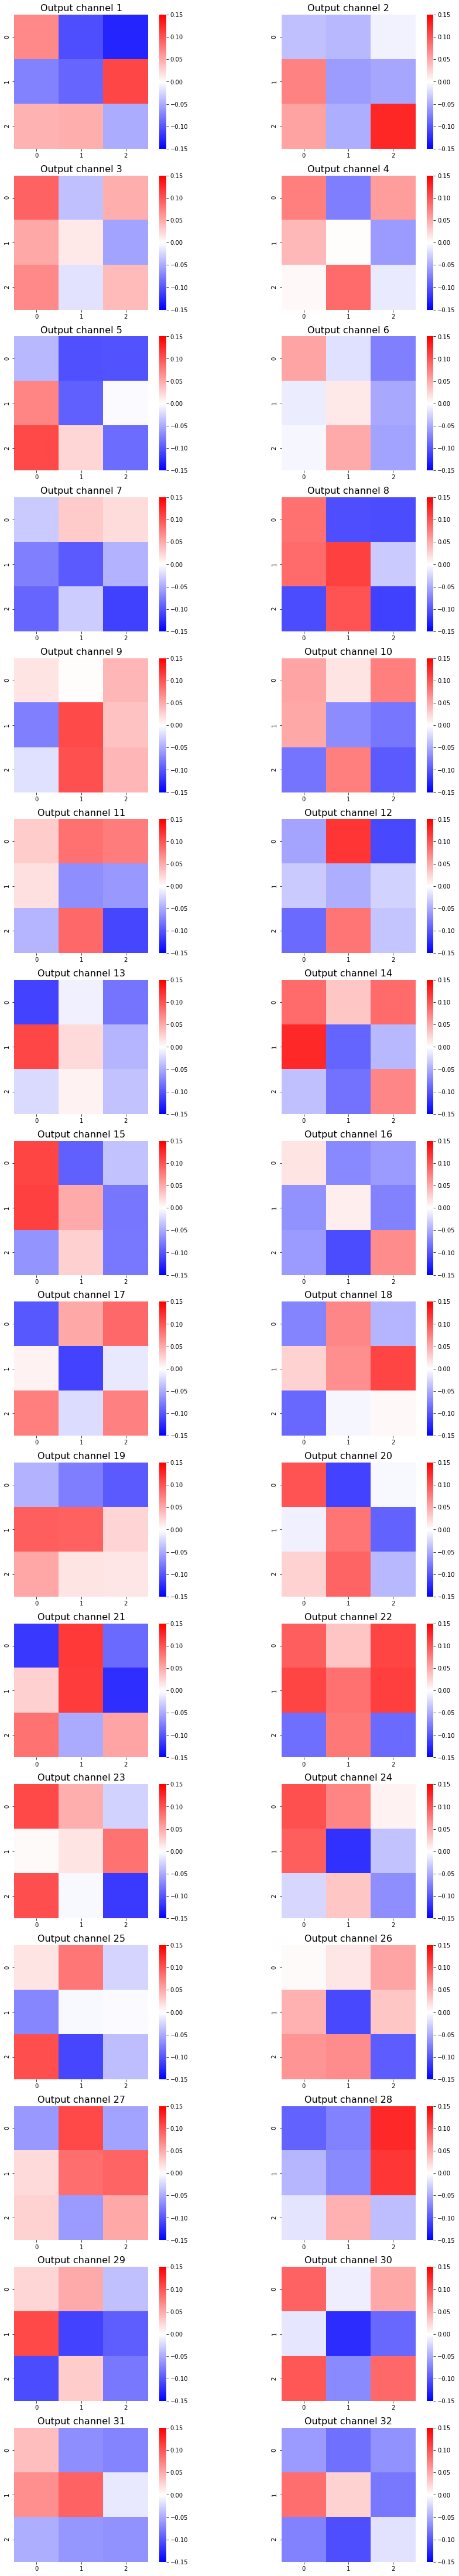

In [8]:
conv_layer2 = CNNModel.get_layer(index=3)
filter2 = conv_layer2.get_weights()[0] # Weights of the 2st convolution layer (without the bias)
chan2 = filter2.shape[3] # Number of output channels in convolution layer 1

fig = plt.figure(figsize=(15, 80))
sub_vert = (chan2+1)/2
sub_hori = 2
for i in range(chan2):
    ax = fig.add_subplot(sub_vert, sub_hori, i+1)
    ax.set_title("Output channel {}".format(i+1), fontsize=16)
    sns.heatmap(filter2[:, :, 0, i], vmin=-0.15, vmax=0.15, center=0, square=True, cmap="bwr")
    print("Output channel {}: Mean = {}, Standard deviation = {}".format(i+1, filter2[:, :, 0, i].mean(),
          filter2[:, :, 0, i].std()))